In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
coffe_sales = pd.read_csv('index_1.csv')

In [4]:
coffe_sales.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
coffe_sales.shape

(3636, 6)

In [6]:
coffe_sales.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [7]:
coffe_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [8]:
coffe_sales.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [10]:
coffe_sales['date'] = pd.to_datetime(coffe_sales['date'])
coffe_sales['datetime'] = pd.to_datetime(coffe_sales['datetime'])

In [11]:
coffe_sales.nunique()

date            381
datetime       3636
cash_type         2
card           1316
money            20
coffee_name       8
dtype: int64

In [13]:
coffe_sales.isnull().sum()
coffe_sales.dropna(inplace=True)

In [31]:
coffe_sales['cash_type'].value_counts()

cash_type
card    3547
Name: count, dtype: int64

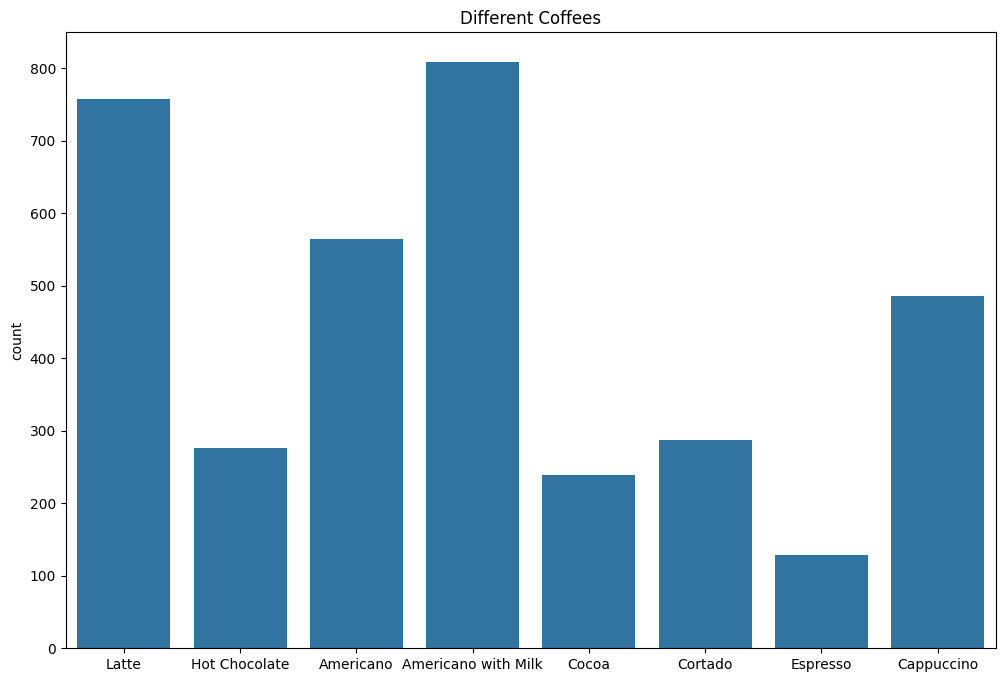

In [14]:
#Sales by Coffe
plt.figure(figsize=(12,8))
sns.countplot(data=coffe_sales, x=coffe_sales['coffee_name'].values)
plt.title('Different Coffees')
plt.show()

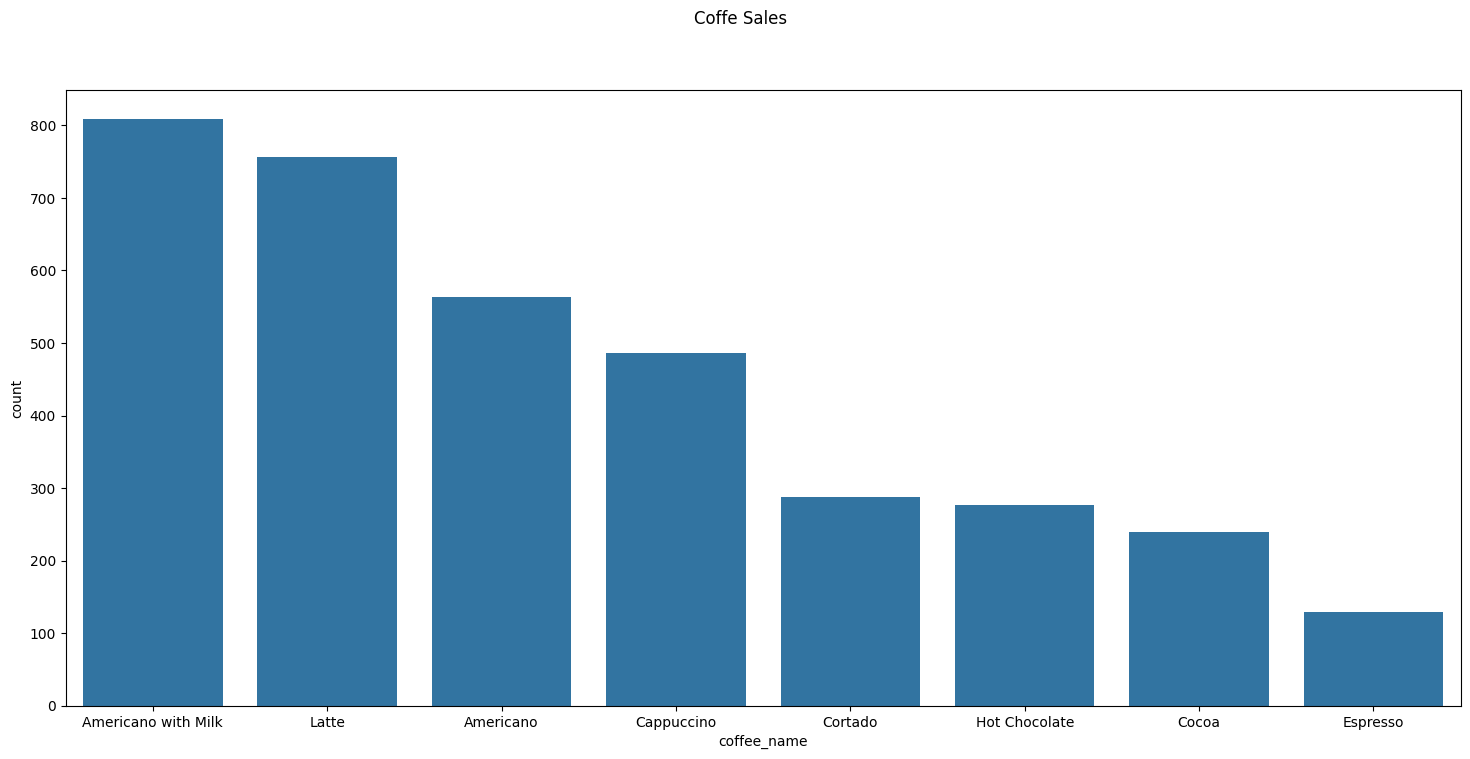

In [32]:
fig, axes = plt.subplots(figsize=(18,8))
fig.suptitle("Coffe Sales")
sns.countplot(data=coffe_sales, x='coffee_name', order = coffe_sales['coffee_name'].value_counts().index)
plt.show()

<Axes: xlabel='money', ylabel='Count'>

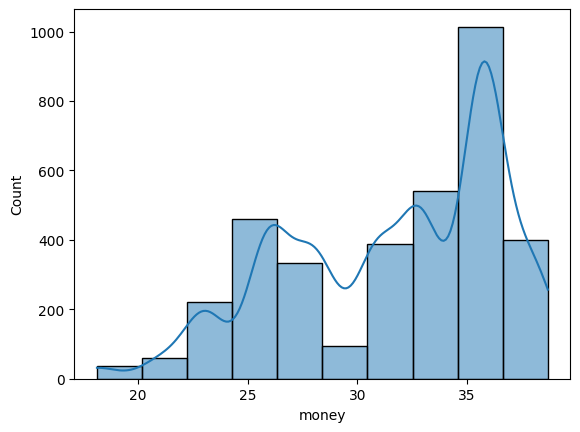

In [24]:
sns.histplot(coffe_sales['money'], bins= 10, kde=True)

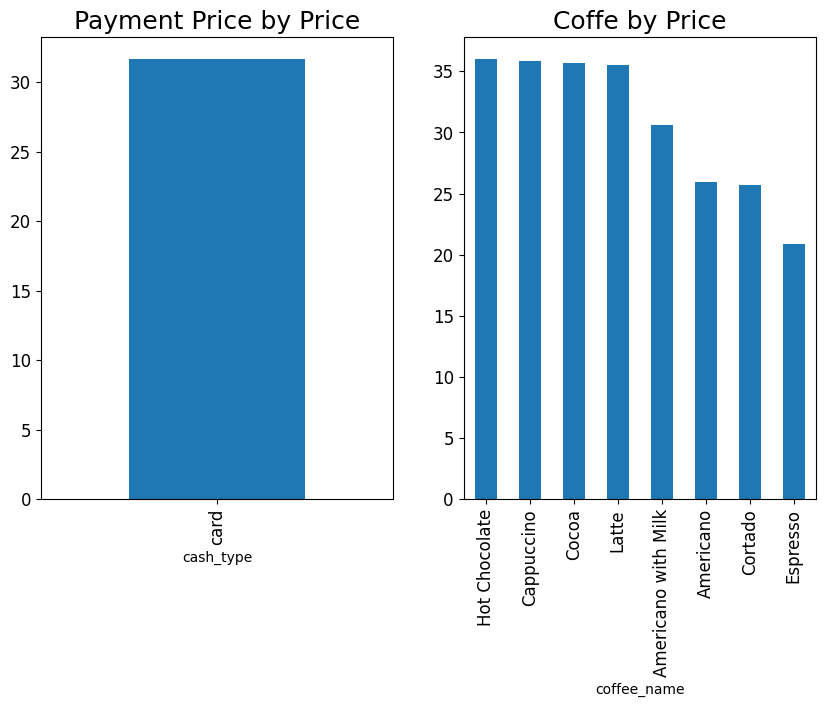

In [25]:
fig, axarr = plt.subplots(1, 2, figsize= (10, 6))
coffe_sales.groupby('cash_type')['money'].mean().sort_values(ascending=False).plot.bar(ax= axarr[0], fontsize=12)
axarr[0].set_title("Payment Price by Price", fontsize=18)

coffe_sales.groupby('coffee_name')['money'].mean().sort_values(ascending= False).plot.bar(ax= axarr[1], fontsize=12)
axarr[1].set_title('Coffe by Price', fontsize=18)
plt.show()

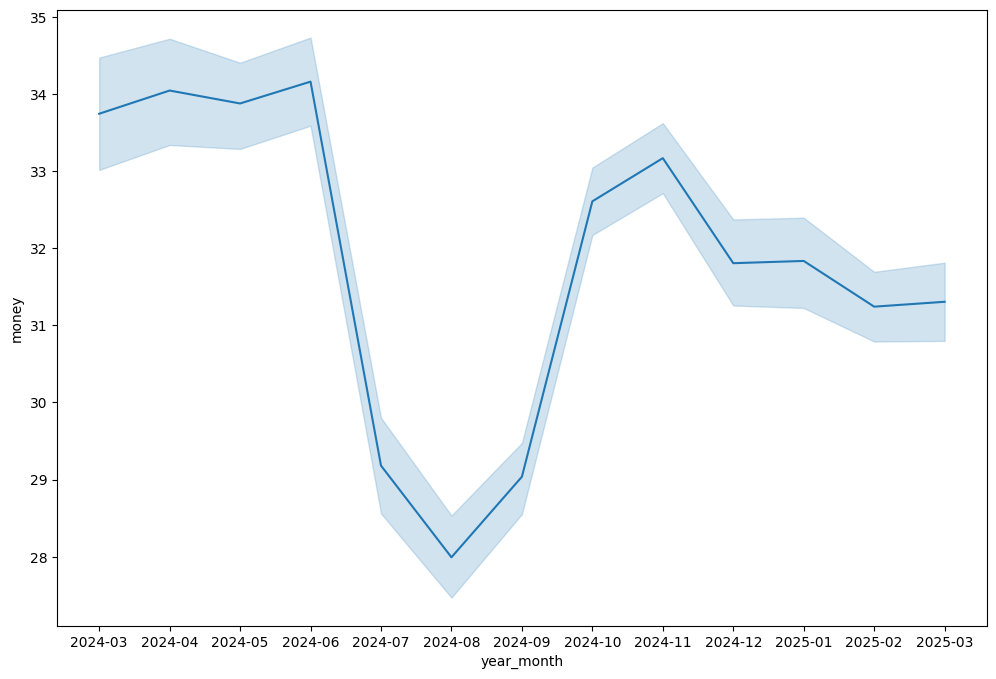

In [26]:
coffe_sales['year_month'] = coffe_sales['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(12, 8))
sns.lineplot(data = coffe_sales, x= coffe_sales['year_month'], y=coffe_sales['money'])
plt.show()